# Model Building

## Load the Data

In [2]:
import pandas as pd

df = pd.read_csv('../data/combined_food_data.csv', index_col=False)
print(df.shape)
df.head()

(37156, 13)


,novaclass,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Calcium,Iron,Sodium,Vitamin C,Cholesterol,"Fatty acids, total saturated",Total Vitamin A
0,4.0,2.897568,3.459152,1.308333,0.815365,-20.000000,0.044017,-7.369791,0.513422,-20.000000,-2.302585,2.893533,-8.037858
1,4.0,3.096934,3.440418,0.548121,-0.478036,-2.302585,-0.487760,-7.775256,0.356275,-6.074846,-2.364460,2.978739,-7.841701
2,4.0,3.208017,3.219276,0.741937,0.207014,-20.000000,-0.258771,-7.402052,0.314811,-20.000000,-2.465104,2.775397,-8.274247
3,4.0,2.824944,3.243764,2.147100,1.720979,-20.000000,-0.382726,-8.254829,0.249980,-20.000000,-2.322788,2.711843,-8.250990
4,4.0,2.797891,3.055415,2.166765,1.990610,-20.000000,-0.576253,-8.016418,0.485508,-20.000000,-2.900422,2.589792,-8.408339


## Preprocessing

In [3]:
df['novaclass'].value_counts()

novaclass
3.0    22116
4.0     4972
1.0     4009
0.0     3327
2.0     2732
Name: count, dtype: int64

A novaclass score of 3 means that most of the foods in the dataset can be considered "processed".

In [4]:
# Create input and output variables
x = df.iloc[:, -12:]
y = df.iloc[:, 0]
print('X Variables:', '\n', x.head(), "\n")
print('Y Variable:', '\n', y.head())

X Variables: 
     Protein  Total Fat  Carbohydrate  Sugars, total  Fiber, total dietary  \
0  2.897568   3.459152      1.308333       0.815365            -20.000000   
1  3.096934   3.440418      0.548121      -0.478036             -2.302585   
2  3.208017   3.219276      0.741937       0.207014            -20.000000   
3  2.824944   3.243764      2.147100       1.720979            -20.000000   
4  2.797891   3.055415      2.166765       1.990610            -20.000000   

    Calcium      Iron    Sodium  Vitamin C  Cholesterol  \
0  0.044017 -7.369791  0.513422 -20.000000    -2.302585   
1 -0.487760 -7.775256  0.356275  -6.074846    -2.364460   
2 -0.258771 -7.402052  0.314811 -20.000000    -2.465104   
3 -0.382726 -8.254829  0.249980 -20.000000    -2.322788   
4 -0.576253 -8.016418  0.485508 -20.000000    -2.900422   

   Fatty acids, total saturated  Total Vitamin A  
0                      2.893533        -8.037858  
1                      2.978739        -7.841701  
2             

## Data Split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29724, 12)
(7432, 12)
(29724,)
(7432,)


A 0.8-0.2 split will be considered for now unless model performance after the RandomizedSearch is horrible.

## Hyperparameter tuning

We should be equally worried about false positives and false negatives since the dependent variable has to do with how "processed" a food is. Two considerations for evaluating the models would be some sort of balanced/weighted metric, or the macro-f1 metric. 

In [ ]:
# Import helper function from another directory
import sys
sys.path.append('../')
from src.model_building_evaluation_functions import *

# Hyperparameter tuning 
random_search_table = randomized_search_loop(X_train, y_train)
random_search_table.head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__gamma,param_model__eta,param_model__alpha,param_model,param_model__n_estimators,param_model__criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
11,128.428947,1.418838,0.440407,0.008129,None,NaN,NaN,NaN,RandomForestClassifier(),500.0,log_loss,"{'model__n_estimators': 500, 'model__max_depth...",0.940646,0.934029,0.938416,0.937697,0.002749,1
10,109.037506,1.260452,0.822133,0.036245,None,NaN,NaN,NaN,RandomForestClassifier(),500.0,gini,"{'model__n_estimators': 500, 'model__max_depth...",0.940039,0.934260,0.938612,0.937637,0.002458,2
20,29.641911,0.438784,0.210547,0.027215,None,NaN,NaN,NaN,RandomForestClassifier(),100.0,log_loss,"{'model__n_estimators': 100, 'model__max_depth...",0.942283,0.930694,0.938061,0.937013,0.004789,3
16,5.195236,0.228001,0.116284,0.007630,6,0.1,0.5,0.0,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,"{'model__max_depth': 6, 'model__gamma': 0.1, '...",0.934215,0.930875,0.936050,0.933713,0.002142,4
21,6.181266,0.596880,0.147770,0.020580,10,0.1,0.3,1.0,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,"{'model__max_depth': 10, 'model__gamma': 0.1, ...",0.932429,0.931316,0.932890,0.932212,0.000661,5
28,4.872396,0.109177,0.115023,0.019499,6,0.3,0.3,0.0,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,"{'model__max_depth': 6, 'model__gamma': 0.3, '...",0.928934,0.925444,0.932370,0.928916,0.002828,6
9,9.674637,0.457773,0.355376,0.041306,10,0.3,0.1,1.0,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,"{'model__max_depth': 10, 'model__gamma': 0.3, ...",0.930858,0.922820,0.930369,0.928016,0.003679,7
19,4.373671,0.132062,0.078315,0.009286,6,0.3,0.5,1.0,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,"{'model__max_depth': 6, 'model__gamma': 0.3, '...",0.929077,0.921789,0.926749,0.925872,0.003039,8
12,4.492066,0.376605,0.071409,0.001840,10,0.3,0.5,1.0,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,"{'model__max_depth': 10, 'model__gamma': 0.3, ...",0.927673,0.923444,0.925427,0.925514,0.001727,9
2,4.212534,0.103673,0.025138,0.003817,50,NaN,NaN,NaN,RandomForestClassifier(),10.0,entropy,"{'model__n_estimators': 10, 'model__max_depth'...",0.927423,0.924476,0.923858,0.925253,0.001555,10


Hyperparameters and Smote did not do much in terms of improving the f1-macro score. Let's just use a default RandomForest model with 100 trees for safe measures.

## Retraining and Evaluating Final Model

In [8]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

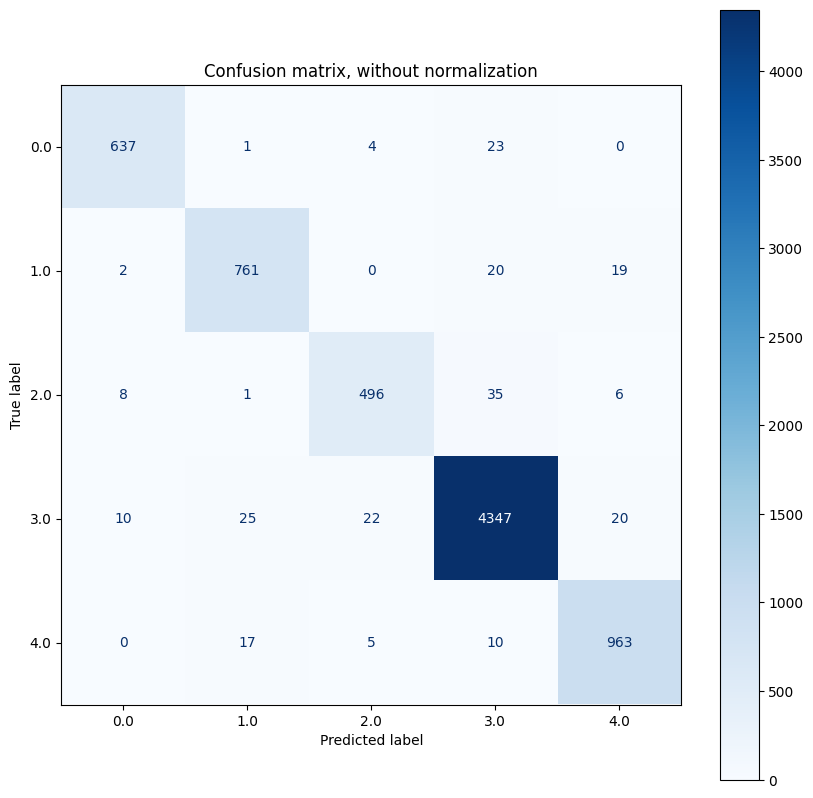

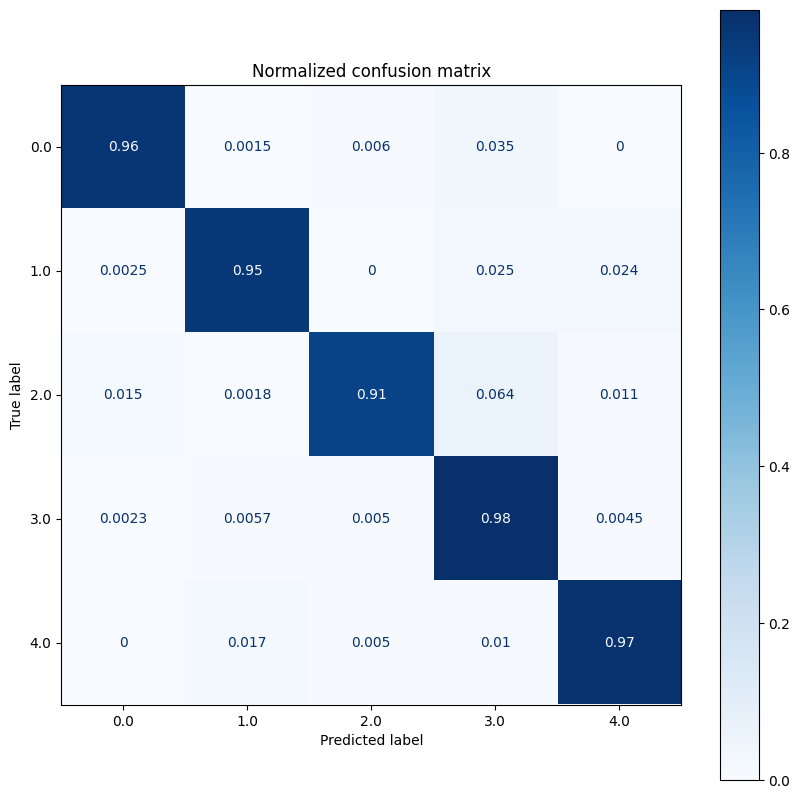


 Classification Report: 
               precision    recall  f1-score   support

         0.0     0.9696    0.9579    0.9637       665
         1.0     0.9453    0.9489    0.9471       802
         2.0     0.9412    0.9084    0.9245       546
         3.0     0.9802    0.9826    0.9814      4424
         4.0     0.9554    0.9678    0.9616       995

    accuracy                         0.9693      7432
   macro avg     0.9583    0.9531    0.9556      7432
weighted avg     0.9693    0.9693    0.9693      7432



In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Test data
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),  # true --> sum of true values (rowwise total sum)
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        rf_model,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    fig = disp.figure_
    fig.set_figwidth(10)
    fig.set_figheight(10) 
plt.show()



# F1-score
y_pred = rf_model.predict(X_test)
print('\n', 'Classification Report:', '\n', classification_report(y_test, y_pred, digits = 4))

## Saving the Model

In [ ]:
import joblib
#joblib.dump(rf_model, 'rf_model.pkl')
